In [37]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
import numpy as np


In [78]:
# Load the data into a pandas dataframe
df = pd.read_csv('/Users/kmanv/Desktop/SportsCar.csv')
# Get basic statistics for each column
print(df.describe())

# Get the total number of rows and columns in the dataframe
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

# Get the names of all columns in the dataframe
print('Column names:', df.columns)

# Get the count of non-null values for each column
print(df.count())

              Year  Engine Size (L)  0-60 MPH Time (seconds)         Price  \
count   948.000000       948.000000               948.000000  9.480000e+02   
mean   2021.178270         4.395781                 3.586920  3.427690e+05   
std       2.074859         1.398801                 0.724134  6.909038e+05   
min    1965.000000         0.000000                 1.900000  2.500000e+04   
25%    2021.000000         3.500000                 3.000000  7.047125e+04   
50%    2021.000000         4.000000                 3.500000  1.217500e+05   
75%    2022.000000         5.200000                 4.000000  2.402500e+05   
max    2023.000000         8.400000                 6.500000  5.200000e+06   

       Unnamed: 7    Unnamed: 8  
count         0.0      3.000000  
mean          NaN   3521.160895  
std           NaN   5611.743573  
min           NaN    181.000000  
25%           NaN    281.741342  
50%           NaN    382.482684  
75%           NaN   5191.241342  
max           NaN  10000.

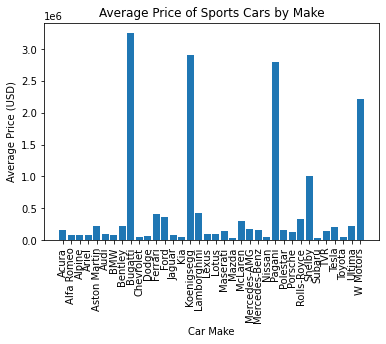

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a Pandas dataframe, specifying the delimiter as semicolon
df = pd.read_csv('/Users/kmanv/Desktop/SportsCar.csv')

# Calculate the average price by car make
avg_price = df.groupby('Make')['Price'].mean()

# Create a bar chart of the average price by car make
plt.bar(avg_price.index, avg_price)

# Add labels to the x and y axes
plt.xlabel('Car Make')
plt.ylabel('Average Price (USD)')

# Add a title to the plot
plt.title('Average Price of Sports Cars by Make')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


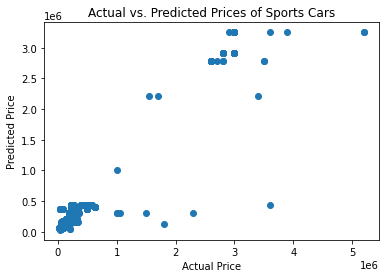

In [81]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data into a Pandas dataframe
df = pd.read_csv('/Users/kmanv/Desktop/SportsCar.csv')

# Remove rows with "Price" value of "1000+"
df = df[df['Price'] != '1000+']

# Convert "Price" column to float
df['Price'] = df['Price'].astype(float)

# Perform one-hot encoding on the "Car Make" column
X = pd.get_dummies(df['Make'])

# Extract the "Price" column
y = df['Price']

# Fit a linear regression model to the one-hot encoded variables
model = LinearRegression()
model.fit(X, y)

# Compute the predicted prices for each car make
pred_prices = pd.Series(model.predict(X), index=df['Make'])

# Create a scatter plot of the actual vs. predicted prices
plt.scatter(y, pred_prices)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices of Sports Cars')
plt.show()






In [82]:
# Create a linear regression model and fit it to the data
X = pd.get_dummies(df['Horsepower'], drop_first=True)
y = df['Price']
reg = LinearRegression().fit(X, y)

# Calculate the R-squared value for the model
r_squared = reg.score(X, y)
print("R-squared value:", r_squared)

R-squared value: 0.9635127660221093


In [83]:
# Create a linear regression model and fit it to the data
X = pd.get_dummies(df['Make'], drop_first=True)
y = df['Price']
reg = LinearRegression().fit(X, y)

# Calculate the R-squared value for the model
r_squared = reg.score(X, y)
print("R-squared value:", r_squared)

R-squared value: 0.9131499911254224


In [87]:
# Create a linear regression model and fit it to the data
X = pd.get_dummies(df['0-60 MPH Time (seconds)'], drop_first=True)
y = df['Price']
reg = LinearRegression().fit(X, y)

# Calculate the R-squared value for the model
r_squared = reg.score(X, y)
print("R-squared value:", r_squared)

R-squared value: 0.6433488641442776


In [88]:
# Create a linear regression model and fit it to the data
X = pd.get_dummies(df['Year'], drop_first=True)
y = df['Price']
reg = LinearRegression().fit(X, y)

# Calculate the R-squared value for the model
r_squared = reg.score(X, y)
print("R-squared value:", r_squared)

R-squared value: 0.004699137871032266


In [90]:
# Create a linear regression model and fit it to the data
X = pd.get_dummies(df['Engine Size (L)'], drop_first=True)
y = df['Price']
reg = LinearRegression().fit(X, y)

# Calculate the R-squared value for the model
r_squared = reg.score(X, y)
print("R-squared value:", r_squared)

R-squared value: 0.578644719602532


In [92]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/kmanv/Desktop/SportsCar.csv')

# Specify the input and output variables
X = df[['Engine Size (L)']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared value:', r2)




Mean squared error: 380489831954.2372
R-squared value: 0.13185008677626298


InvalidIndexError: (slice(None, None, None), None)

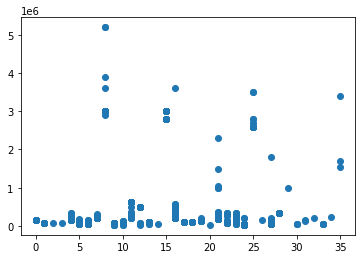

In [94]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# Load the data into a pandas dataframe
df = pd.read_csv('/Users/kmanv/Desktop/SportsCar.csv')

# Encode the make column as numerical values
le = LabelEncoder()
df['Make'] = le.fit_transform(df['Make'])

# Create a linear regression model for the make and the price
X = df[['Make']]
y = df['Price']
model = LinearRegression().fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the data and the regression line
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Linear Regression Model: Make vs. Price')
plt.show()

